In [1]:
import pandas, numpy
from svrpack.globals import NUM_CLIENTS, WEIGHTS, DATA_PATH, NUM_CORES
from svrpack import Server_Algorithm
from matplotlib import pyplot, cm
from matplotlib.ticker import FuncFormatter
from os import path

## Pipeline_1
Data_Proprocessing

In [2]:
data_path = path.join(DATA_PATH, "test.feather")
test_data = pandas.read_feather(data_path)

In [3]:
test_data = test_data[:50000]

In [4]:
test_data.sample(15)

,dst_port,flow_duration,totlen_fwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_std,bwd_pkt_len_max,bwd_pkt_len_min,bwd_pkt_len_mean,bwd_pkt_len_std,...,active_std,active_max,active_min,idle_mean,idle_std,idle_min,intrusion,protocol_0,protocol_6,protocol_17
4321804,22,0.999870,1.357417e-05,0.009932,0.0,0.007394,0.014979,0.0,0.003576,0.012128,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.0,0,1,0
4367181,44619,0.999966,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000224,0.000000e+00,0.000368,0.0,0,1,0
1643891,3389,0.999874,9.959012e-06,0.011251,0.0,0.010676,0.018094,0.0,0.006387,0.019012,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0,1,0
3902214,443,0.999937,6.821715e-06,0.010289,0.0,0.009798,0.022406,0.0,0.006941,0.021515,...,0.005666,0.010048,0.000548,0.000025,7.168717e-08,0.000042,0.0,0,1,0
151972,8080,0.999869,2.257745e-06,0.005059,0.0,0.010228,0.001719,0.0,0.000952,0.002521,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.0,0,1,0
861867,46072,0.999875,6.475435e-06,0.014510,0.0,0.022723,0.004573,0.0,0.002932,0.008068,...,0.000000,0.000000,0.000000,0.000013,0.000000e+00,0.000022,0.0,0,1,0
1070441,55834,0.999874,6.475435e-06,0.014510,0.0,0.022723,0.005310,0.0,0.003404,0.009367,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0,1,0
3118258,80,0.999876,6.717831e-07,0.001505,0.0,0.002636,0.003560,0.0,0.001712,0.005439,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0,1,0
5512031,3389,0.999870,1.038840e-06,0.002328,0.0,0.003645,0.028745,0.0,0.018428,0.050706,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0,1,0
5490007,3389,0.999871,7.839778e-06,0.010258,0.0,0.012107,0.018002,0.0,0.006667,0.020168,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0,1,0


## Pipeline_2
Federated learning using the server package 

In [5]:
print(f"{NUM_CLIENTS = }")
print(f"{NUM_CORES = }")

num_rounds = 20
print(f"{num_rounds = }")

NUM_CLIENTS = 1
NUM_CORES = 4
num_rounds = 20


In [6]:
ServerAlg = Server_Algorithm(X=test_data.drop(['intrusion'], axis=1), y=test_data[['intrusion']], num_rounds=num_rounds)

In [7]:
history = ServerAlg(server_address = '127.0.0.1', port = 1234)


Starting communication...

Initial state
Test performance of global model: Loss: 4.134e-02 | Accuracy: 13.0620 %
Train performance of local models (Averaged): Loss: 6.109e-04 | Accuracy: 79.1706 %

Round: 1
Test performance of global model: Loss: 5.934e-04 | Accuracy: 86.9700 %
Validation performance of local models (Averaged): Loss: 6.343e-04 | Accuracy: 86.4873 %
Train performance of local models (Averaged): Loss: 6.007e-04 | Accuracy: 80.6334 %

Round: 2
Test performance of global model: Loss: 5.894e-04 | Accuracy: 86.9700 %
Validation performance of local models (Averaged): Loss: 6.301e-04 | Accuracy: 86.4873 %
Train performance of local models (Averaged): Loss: 5.917e-04 | Accuracy: 81.5593 %

Round: 3
Test performance of global model: Loss: 5.844e-04 | Accuracy: 86.9700 %
Validation performance of local models (Averaged): Loss: 6.247e-04 | Accuracy: 86.4873 %
Train performance of local models (Averaged): Loss: 5.833e-04 | Accuracy: 82.3763 %

Round: 4
Test performance of global 

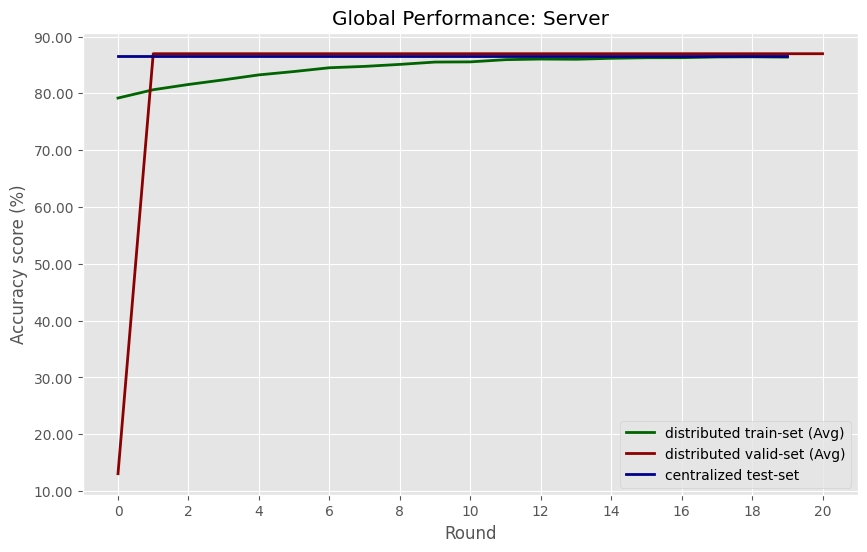

In [8]:
def scientific_notation(x, pos):
    return '{:.2f}'.format(x*100)
# `history` contains the accuracy and loss results

accuracy_distributed_train = [ e[1] for e in history.metrics_distributed_fit["Accuracy"]]
accuracy_distributed_valid = [ e[1] for e in history.metrics_distributed["Accuracy"]]
accuracy_centralized_test = [ e[1] for e in history.metrics_centralized["Accuracy"]]

logs_df = pandas.DataFrame([accuracy_distributed_train, 
                            accuracy_centralized_test,
                            accuracy_distributed_valid
                           ], index=['accuracy_distributed_train', 
                                     'accuracy_distributed_valid',
                                     'accuracy_centralized_test']).T

colors = cm.ocean(numpy.linspace(0, 1, 100))
pyplot.style.use('ggplot')


ax = logs_df['accuracy_distributed_train'].plot(kind='line', 
                                      figsize=(10, 6), 
                                      title="Global Performance: Server", 
                                      xlabel='Round', 
                                      ylabel='Accuracy score (%)', 
                                      label='distributed train-set (Avg)', 
                                      color='darkgreen',
                                      linewidth=2)

ax.set_xticks(range(0, len(logs_df.index)+1, 2))
#numpy.arange(num_rounds)


ax = logs_df['accuracy_distributed_valid'].plot(kind='line', 
                                      label='distributed valid-set (Avg)', 
                                      color='darkred', 
                                      linewidth=2)

ax = logs_df['accuracy_centralized_test'].plot(kind='line', 
                                      label='centralized test-set', 
                                      color='darkblue', 
                                      linewidth=2)
ax.legend(loc='lower right')
ax.yaxis.set_major_formatter(FuncFormatter(scientific_notation))

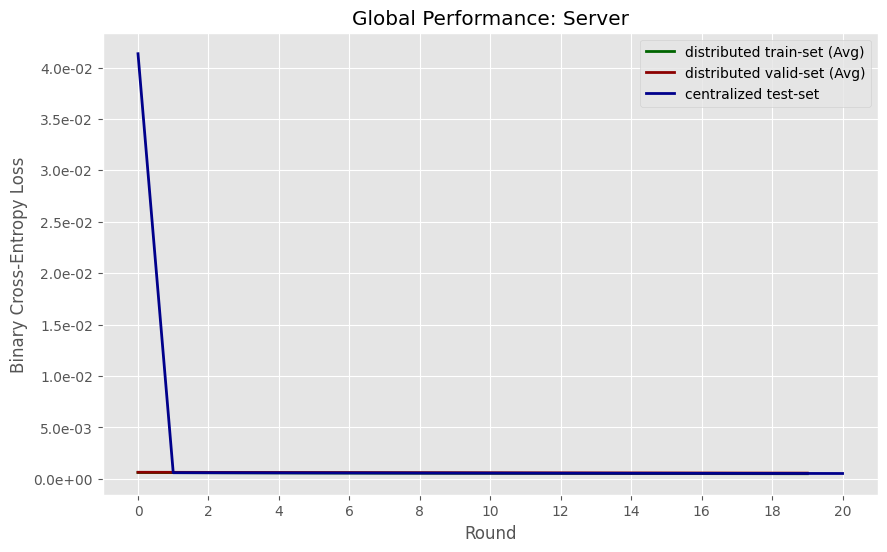

In [9]:
def scientific_notation(x, pos):
    return '{:.1e}'.format(x)
# `history` contains the accuracy and loss results

loss_distributed_train = [ e[1] for e in history.metrics_distributed_fit["Loss"]]
loss_distributed_valid = [ e[1] for e in history.metrics_distributed["Loss"]]
loss_centralized_test = [ e[1] for e in history.losses_centralized]



logs_df = pandas.DataFrame([loss_distributed_train, 
                            loss_distributed_valid,
                            loss_centralized_test
                           ], index=['loss_distributed_train', 
                                     'loss_distributed_valid',
                                     'loss_centralized_test']).T

colors = cm.ocean(numpy.linspace(0, 1, 100))
pyplot.style.use('ggplot')


ax = logs_df['loss_distributed_train'].plot(kind='line', 
                                      figsize=(10, 6), 
                                      title="Global Performance: Server", 
                                      xlabel='Round', 
                                      ylabel='Binary Cross-Entropy Loss', 
                                      label='distributed train-set (Avg)', 
                                      color='darkgreen',
                                      linewidth=2)

ax.set_xticks(range(0, len(logs_df.index)+1, 2))
#numpy.arange(num_rounds)


ax = logs_df['loss_distributed_valid'].plot(kind='line', 
                                      label='distributed valid-set (Avg)', 
                                      color='darkred', 
                                      linewidth=2)

ax = logs_df['loss_centralized_test'].plot(kind='line', 
                                      label='centralized test-set', 
                                      color='darkblue', 
                                      linewidth=2)
ax.legend(loc='upper right')
ax.yaxis.set_major_formatter(FuncFormatter(scientific_notation))